# Regressão Linear com TensorFlow

Importar a bilioteca numpy:

In [0]:
import numpy as np

Criação das matrizes para armazenar a idade [X] e o valor do plano de saúde [Y]:

In [26]:
X = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])
print(X)

[[18]
 [23]
 [28]
 [33]
 [38]
 [43]
 [48]
 [53]
 [58]
 [63]]


In [27]:
Y = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])
print(Y)

[[ 871]
 [1132]
 [1042]
 [1356]
 [1488]
 [1638]
 [1569]
 [1754]
 [1866]
 [1900]]


## Escalonamento dos Valores

Procedimento necessário quando se trabalhar com regressão linear com o TensorFlow. O escalonamento é importante para que os valores envolvidos fiquem no mesmo padrão.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()

Para nós fazermos efetivamente a transformação da variável X para valores escalonados, devemos executar o seguinte código:

In [29]:
X = scaler_x.fit_transform(X)
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


Vamos fazer a mesma coisa para o Y:

In [30]:
scaler_y = StandardScaler()
Y = scaler_y.fit_transform(Y)
print(Y)

[[-1.75751985]
 [-0.98083058]
 [-1.24865447]
 [-0.31424669]
 [ 0.07856167]
 [ 0.52493481]
 [ 0.31960317]
 [ 0.87013004]
 [ 1.20342199]
 [ 1.3045999 ]]


## Visualizar um Gráfico

Importar a bilioteca `matplotlib.pyplot`:

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Para plotar o gráfico:

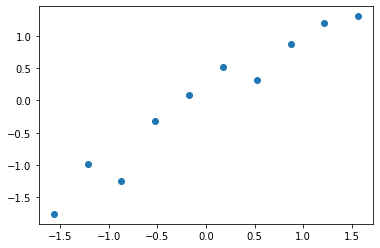

In [32]:
plt.scatter(X, Y)

Temos a mesma disposição dos pontos que antes do escalonamento, isso porque o escalonamento não apenas coloca o dado em uma escala diferente.

## Fórmula da Regressão Linear Simples

Agora nós criaremos a nossa fórmula para regressão linear simples. 

Y = $b_0$ + $b_1$ * $X_1$

Onde:


*   Y = previsão de custo;
*   $b_0$ = constante, valor inicial;
*   $b_1$ = coeficiente, declive da linha;
*   $X_1$ = idade.

Lembrando que o objetivo é encontrar os valores de $b_0$ e $b_1$.

Vamos criar um otimizador que irá encontra esses dois parâmetros. E quando ele executa pela primeira vez, em geral, ele vai inicializar esses dois parâmetros de forma aleatória. E o processo, utilizando a descida do gradiente, consiste em encontrar os valores por meio dos quais se obtém o menor erro possível entre a previsão e os valores reais do plano de saúde.

In [33]:
np.random.seed(0) # 0 - para sempre inicializar com os mesmo valores
np.random.rand(2)

array([0.5488135 , 0.71518937])

Estamos inicializando com esses dois valores, para que você entenda que, internamente, o algoritmo vai utilizar essas funções randômicas para gerar esses dois valores iniciais.

Importar o TensorFlow:

In [34]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.__version__

'2.2.0'

Vamos utilizar variáveis e não constantes, porque nós queremos otimizar estes dois valores.

In [35]:
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)
print(b0)

<tf.Variable 'Variable_4:0' shape=() dtype=float32_ref>


### Cálculo do Erro

Iremos utilizar o *Mean Square Error*, para o ajuste dos parâmetros. Para isso, teremos que criar uma fórmula que receba:



*   O pacote `losses`: que trata das perdas;
*   O método `mean_squared_error()`: para calcular o erro quadrático médio entre os valores reais e os valores previstos. Para calcular os valores previstos, iremos utilizar a fórmula da regressão linear simples.



In [0]:
erro = tf.losses.mean_squared_error(Y,(b0 + b1 * X))

Para fazermos o treinamento, iremos utilizar a descida do gradiente. Lembrando que se o valor da taxa de aprendizagem for muito pequeno, ele vai demorar mais para chegar no mínimo global, mas se o valor for grande, ele pode não alcançar o melhor valor esperado. Saiba que o mínimo global é o menor valor possível.

In [0]:
otimizador = tf.train.GradientDescentOptimizer(learning_rate=0.001)

Treinamento:é uma regressão linear, é você utilizar a descida do gradiente para você encontrar o menor erro possível.

In [0]:
treinamento = otimizador.minimize(erro)

Inicializar as variáveis:

In [0]:
init = tf.global_variables_initializer()

## Fazer o Treinamento

In [0]:
with tf.Session() as sess:
  sess.run(init)
  #print(sess.run(b0))
  #print(sess.run(b1))
  #definir a quantidade de época que iremos executar esse código
  for i in range(1000):
    sess.run(treinamento)
  b0_final, b1_final = sess.run([b0,b1])

In [41]:
b0_final

0.07293497

In [42]:
b1_final

0.9359134

Encontrado os dois parâmetros, agora eu posso fazer classificações.

In [44]:
previsoes = b0_final + b1_final * X
print(previsoes)

[[-1.3933595 ]
 [-1.06751629]
 [-0.74167307]
 [-0.41582985]
 [-0.08998664]
 [ 0.23585658]
 [ 0.56169979]
 [ 0.88754301]
 [ 1.21338623]
 [ 1.53922944]]


In [45]:
print(type(previsoes))

<class 'numpy.ndarray'>


Como é do tipo "numpy array", fica fácil para criar um gráfico.

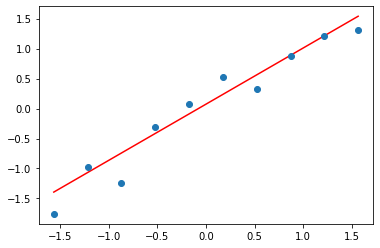

In [49]:
plt.plot(X, previsoes, color = 'red')
plt.plot(X, Y, 'o')

Caso queira fazer uma previsão para uma pessoa que tenha 40 anos:

In [51]:
previsao = b0_final + b1_final * 40
previsao

37.50947032868862

Esse valor de 37 é estranho, para um valor de plano de saúde. Isso acontece porque o 40 não está escalonado. Nesse caso, precisaremos escalonar o valor 40.

In [55]:
previsao = scaler_y.inverse_transform(b0_final + b1_final * scaler_x.transform([[40]]))
print(previsao)

[[1475.15950152]]


Processo para desescalonar as variáveis:

In [56]:
y1 = scaler_y.inverse_transform(Y)
print(y1)

[[ 871.]
 [1132.]
 [1042.]
 [1356.]
 [1488.]
 [1638.]
 [1569.]
 [1754.]
 [1866.]
 [1900.]]


In [57]:
previsoes1 = scaler_y.inverse_transform(previsoes)
print(previsoes1)

[[ 993.37307127]
 [1102.86998723]
 [1212.3669032 ]
 [1321.86381917]
 [1431.36073513]
 [1540.8576511 ]
 [1650.35456707]
 [1759.85148303]
 [1869.348399  ]
 [1978.84531497]]


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y1, previsoes1)
mse = mean_squared_error(y1, previsoes1)
print(mae)
print(mse)

67.91875458994167
7153.9129941765395
